# Task - Prediction using Decision Tree Algorithm

## Problem Statement


#### Create the Decision Tree classifier and visualize it graphically.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

### Read Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Removing insignificant variables

In [7]:
df = df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Distribution of Variables

### Numerical plot

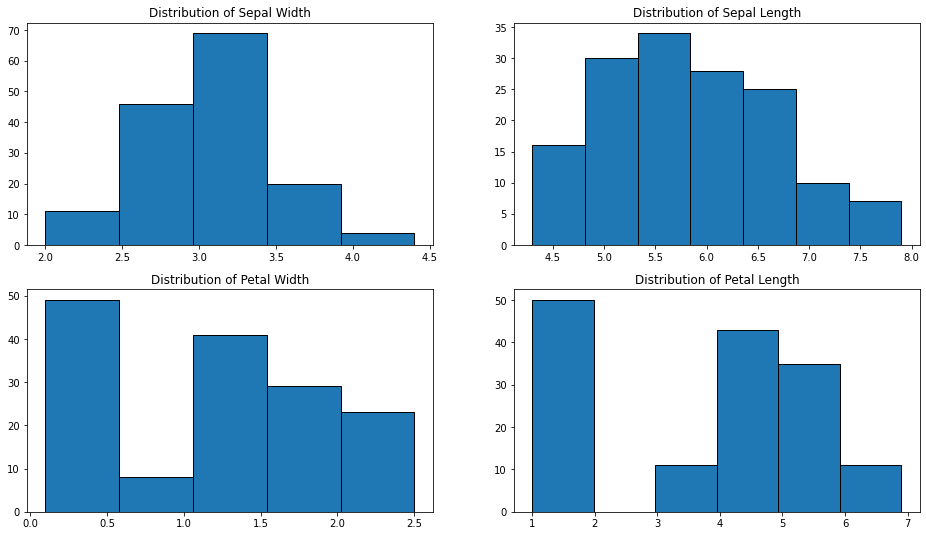

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['SepalWidthCm'], bins=5,ec='black')
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['SepalLengthCm'], bins=7,ec='black')
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['PetalWidthCm'], bins=5,ec='black')
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['PetalLengthCm'], bins=6,ec='black')
plt.show()

#### The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
#### The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
#### The Highest frequency of petal width is between 0 to 0.5 which is around 50.
#### The Highest frequency of petal length is between 0 to 0.5 which is around 50

### Categorical plot

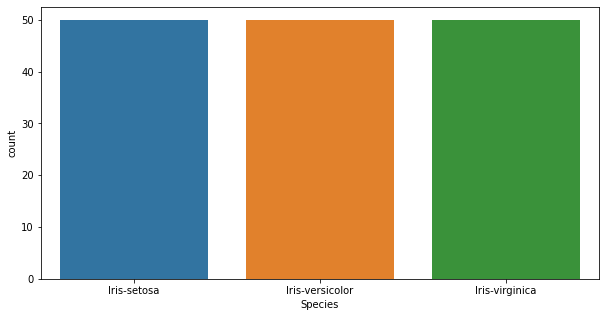

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(df['Species'])
plt.show()

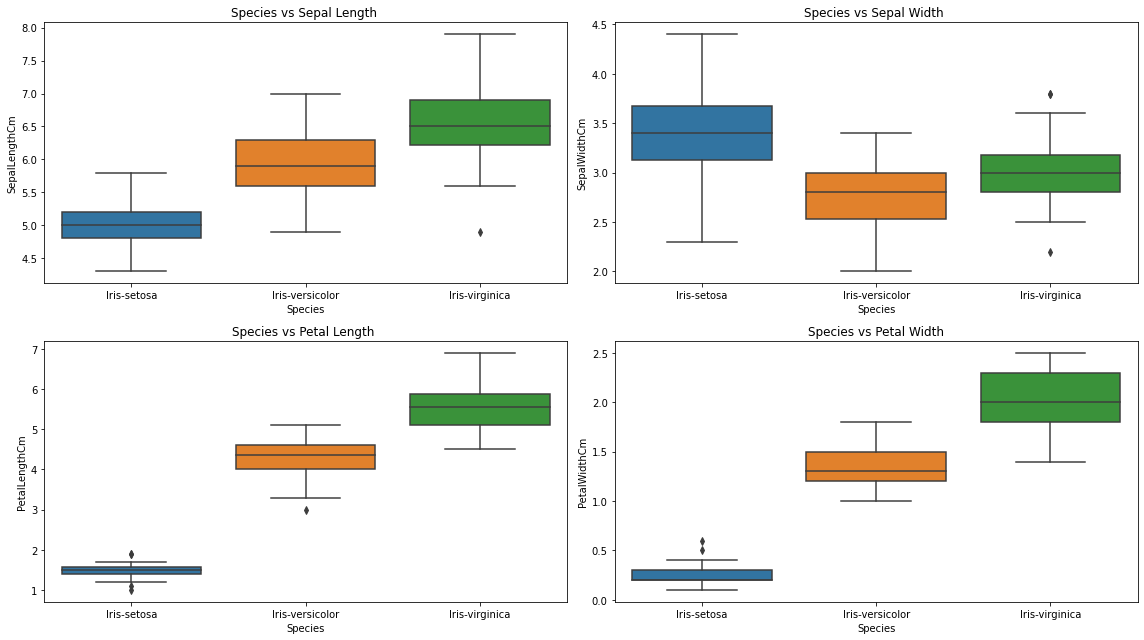

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Species vs Sepal Length ")
sns.boxplot(df['Species'],df['SepalLengthCm'] ,ax=axes[0,0])
axes[0,1].set_title("Species vs Sepal Width ")
sns.boxplot(df['Species'],df['SepalWidthCm'] ,ax=axes[0,1])
axes[1,0].set_title("Species vs Petal Length ")
sns.boxplot(df['Species'],df['PetalLengthCm'] ,ax=axes[1,0])
axes[1,1].set_title("Species vs Petal Width")
sns.boxplot(df['Species'],df['PetalWidthCm'] ,ax=axes[1,1])
plt.tight_layout()
plt.show()

#### as species changes sepal length , petal length as well as petal width increases.
#### But for sepal width as species changes width varies no specific pattern

### Prepare Data

In [11]:
X = df.iloc[:,:-1].values
y = df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).values

In [12]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

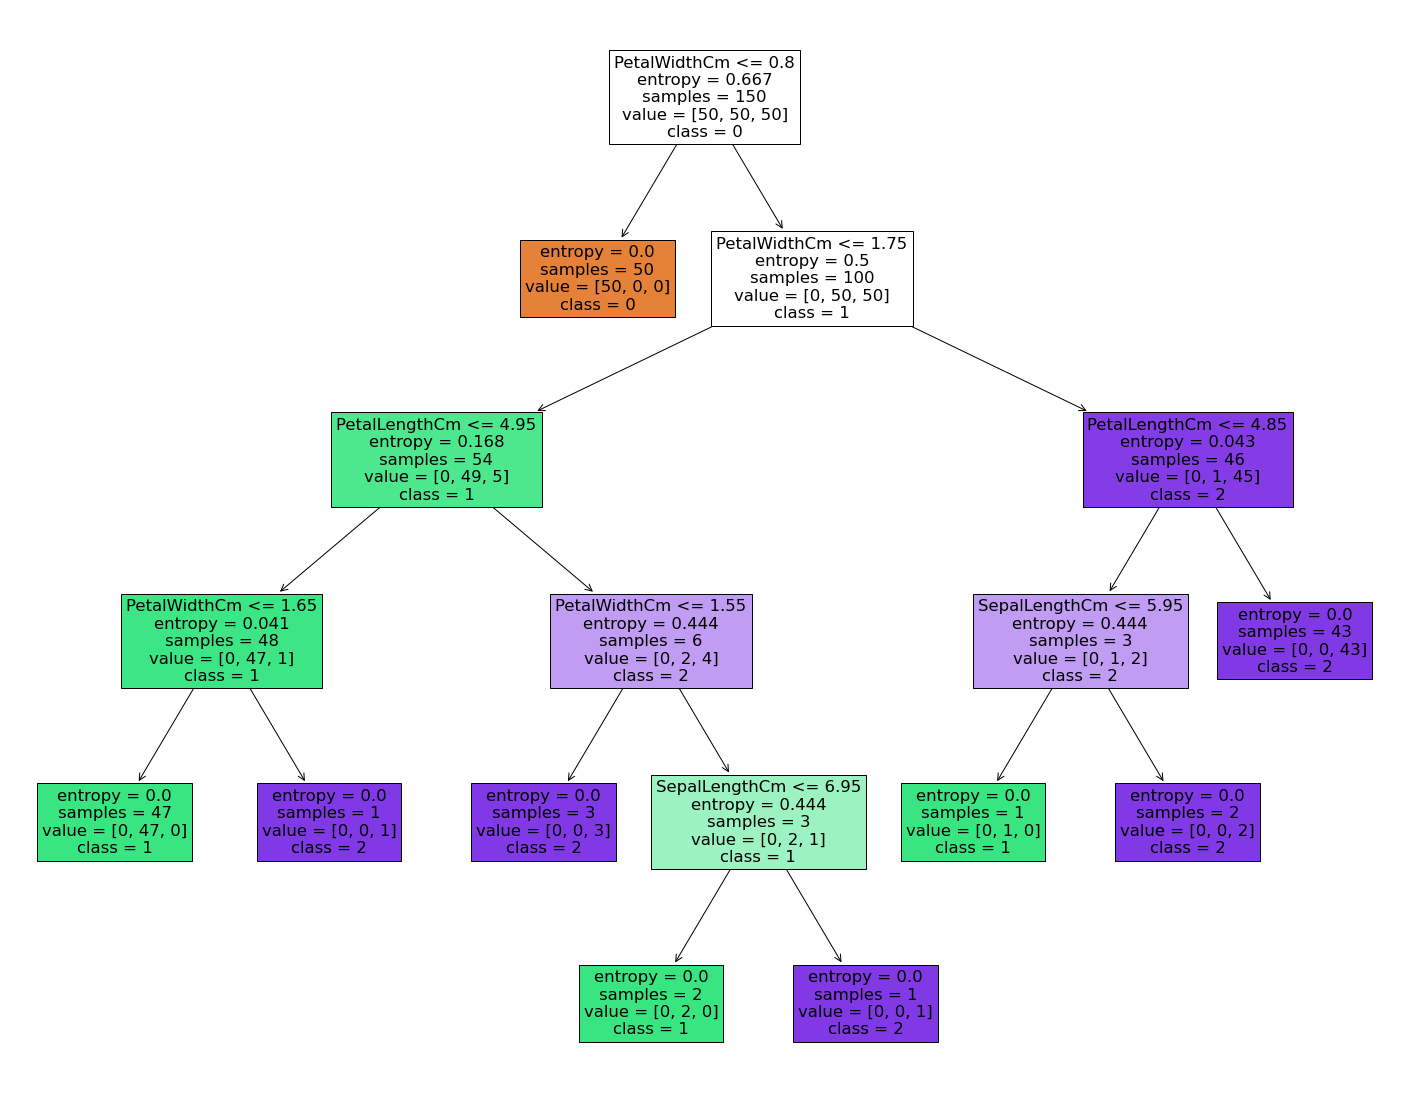

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=list(df.drop('Species',axis=1).columns),  
                   class_names=['0','1','2'],
                   filled=True)


#### The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the  data. We can calculate the accuracy to identify if there is over-fitting.

In [14]:
pred=dt.predict(X)
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



### Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [15]:
param = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(2, 10)}]
 

grid = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = param,n_jobs = -1,verbose  =2,cv = 5)
grid_model = grid.fit(X,y)
print(grid_model.best_params_)

Fitting 5 folds for each of 18432 candidates, totalling 92160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 5524 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 18516 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 36628 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 59988 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 88468 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 92160 out of 92160 | elapsed:  2.1min finished


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [16]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=4,
                            max_features='sqrt',max_leaf_nodes= 5,
                            min_samples_leaf= 1,min_samples_split= 3,random_state=10)
dt.fit(X,y)
gcv_pred=dt.predict(X)
print(classification_report(y,gcv_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.66      0.78        50
           2       0.74      0.96      0.83        50

    accuracy                           0.87       150
   macro avg       0.89      0.87      0.87       150
weighted avg       0.89      0.87      0.87       150



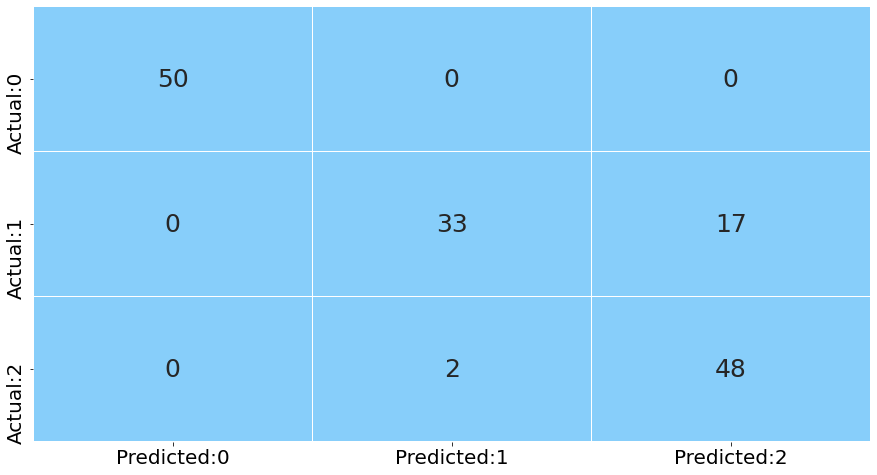

In [17]:
cm = confusion_matrix(y, gcv_pred)

plt.figure(figsize=(15,8))
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']),
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

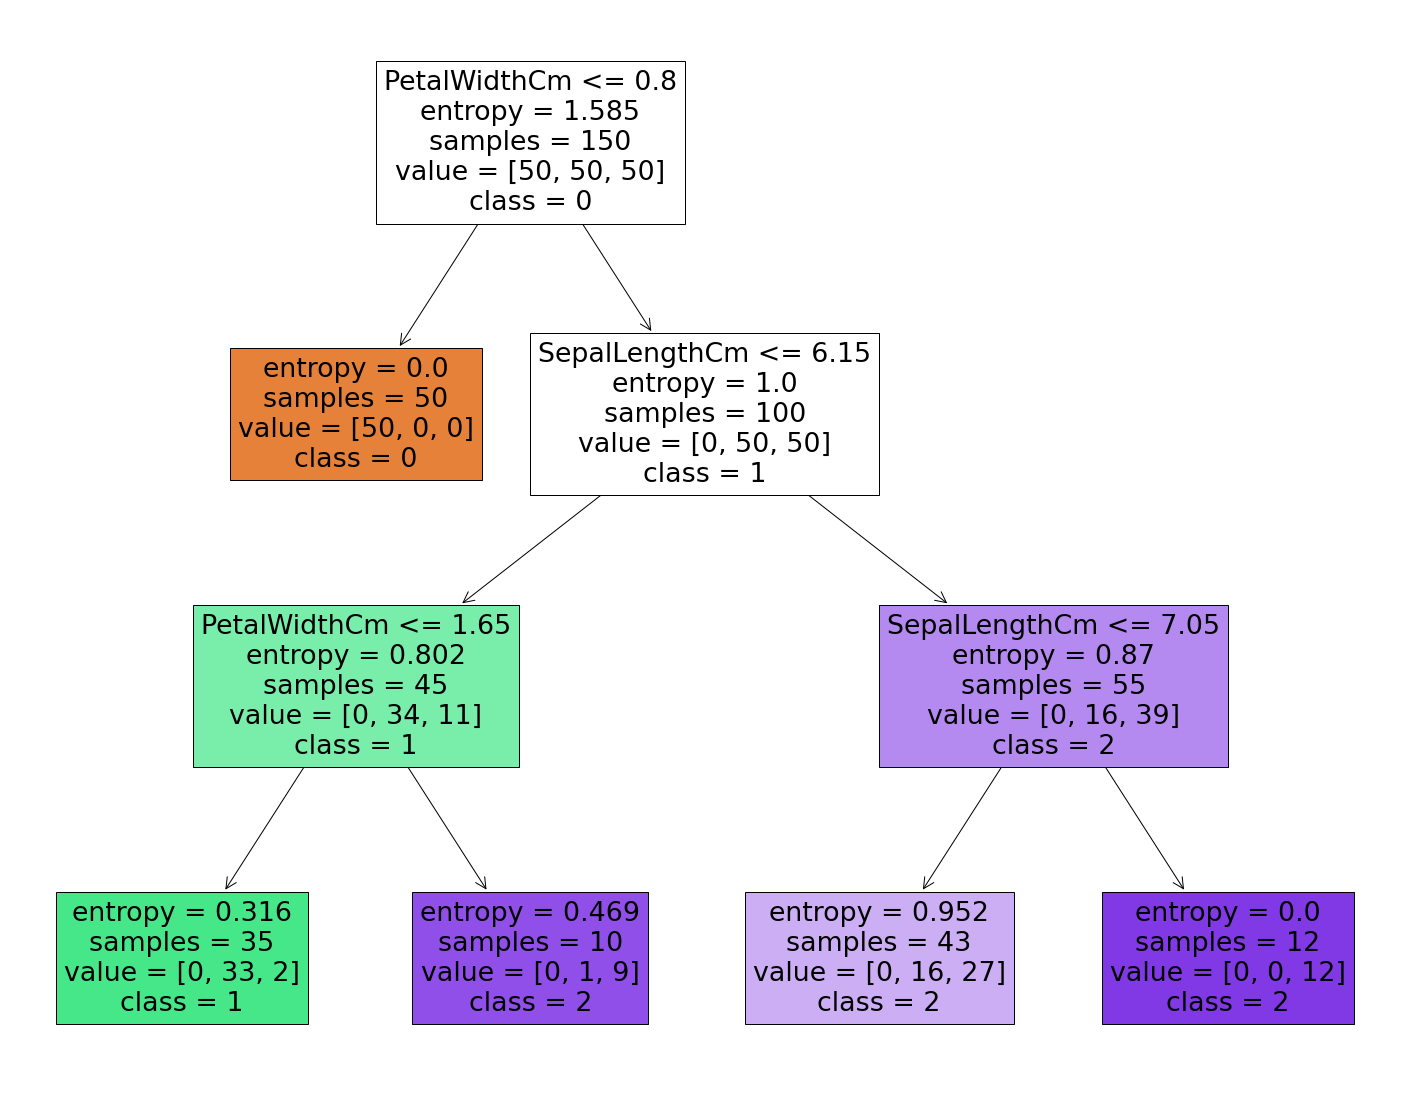

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=list(df.drop('Species',axis=1).columns),  
                   class_names=['0','1','2'],
                   filled=True)